### Logistic Regression

When data scientists may come across a new classification problem, the first algorithm that may come across their mind is Logistic Regression. It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. Logistic Regression is also called Logit Regression. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.   


In statistics, the Logistic Regression model is a widely used statistical model which is primarily used for classification purposes. It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes. So, the target variable is discrete in nature.

**The Logistic Regression algorithm works as follows -**

**1. Implement linear equation**  
Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. For example, we consider the example of number of hours studied and probability of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. Probability of passing the exam is the response or target variable and it is denoted by y.

If we have one explanatory variable (x1) and one response variable (y), then the linear equation would be given mathematically with the following equation-  

y = β0 + β1x1  

Here, the coefficients β0 and β1 are the parameters of the model.

If there are multiple explanatory variables, then the above equation can be extended to

y = β0 + β1x1+ β2x2+……..+ βnxn

Here, the coefficients β0, β1, β2 and βn are the parameters of the model.

So, the predicted response value is given by the above equations and is denoted by y.

**2. Sigmoid Function**  
This predicted response value, denoted by y is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.

In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an S shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.



**3. Decision boundary**  
The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.  

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0.


**4. Making predictions**  
Now, we know about sigmoid function and decision boundary in logistic regression. We can use our knowledge of sigmoid function and decision boundary to write a prediction function. A prediction function in logistic regression returns the probability of the observation being positive, Yes or True. We call this as class 1 and it is denoted by P(class = 1). If the probability inches closer to one, then we will be more confident about our model that the observation is in class 1, otherwise it is in class 0.


### Assumptions of Logistic Regression

1. **Dependent variable type**

   * The outcome you are predicting should be **categorical**.
   * Usually: **binary** (Yes/No), **multinomial** (Red/Blue/Green), or **ordinal** (Low/Medium/High).
   * **Example:** Predict if a delivery is **On-time (1) or Delayed (0)**.

2. **Independent observations**

   * Each observation should be **separate and unrelated**.
   * You shouldn’t use multiple measurements of the same package or person without adjustment.
   * **Example:** Delivery times for different packages on the same day are fine, but repeated scans of the same package shouldn’t be treated as separate observations.

3. **Little or no multicollinearity**

   * Independent variables should **not be too similar** to each other.
   * **Example:** If you include both “Distance in km” and “Delivery Time in hours” in your model, they may be highly correlated. This can confuse the model. Pick one or transform the data.

4. **Linearity of independent variables and log odds**

   * Logistic regression assumes a **straight-line relationship between each independent variable and the log odds** of the outcome.
   * **Example:** Longer distances should steadily increase the probability of delay, not in a weird random way.

5. **Adequate sample size**

   * The model works best with a **large number of observations**.
   * **Example:** If you only have 10 deliveries, predictions will be unreliable. A few thousand records give more stable and accurate results.




In [1]:
# Importing necessary libraries - survey data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)#It tells pandas to display all columns of a DataFrame when printing

In [2]:
adult_df = pd.read_csv(r'C:\Users\udaya\Downloads\adult_data.csv',header=None)
adult_df

#Issues with your data
#There are no headers.
#Therefore, we will give the column names manually.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# give the column names manually.
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_df.shape

(32561, 15)

In [5]:
adult_df.info()
# dtypes: int64 (6), object (9) – The system doesn’t recognize categorical data, so we need to handle it


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
adult_df.describe(include="all") # include="all" tells pandas to include ALL columns both int and object

#income our dependent variable have 2 category so we can apply logistic

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Pre processing the data

In [7]:
#create a copy of the dataframe (just in case for a safer side)
adult_df_rev = pd.DataFrame.copy(adult_df)

In [8]:
# 'duplicated()' checks for duplicate rows in the DataFrame.

adult_df_rev.duplicated().sum()

# we can remove duplicates as compared with data the duploicates are very less

24

In [9]:
# 'drop_duplicates()' removes duplicate rows from the DataFrame.
# inplace=True   directly modifies the original DataFrame (no need to assign again).
# keep="first" if duplicates exist, it keeps the first occurrence and drops the rest.

adult_df_rev.drop_duplicates(inplace=True, keep="first")


adult_df_rev.shape


(32537, 15)

In [10]:
adult_df_rev.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
#fnlwgt - final wgt remove because its a categorical value and it is based on the colms age race and sex
# education remove because same info is given by education no so we will keep it as its numeric 
#and remove education as its categoric



# axis=1  means we are dropping COLUMNS (axis=0 would drop rows).
# inplace=True  directly modifies the original DataFrame instead of returning a new one.

adult_df_rev.drop(["education", "fnlwgt"], axis=1, inplace=True)



adult_df_rev.shape


(32537, 13)

In [12]:
adult_df_rev.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [13]:
#prints the unique values of every column in the dataset, column by column to check if there is any irrelevant data 


# Loop through each column name in the DataFrame 'adult_df_rev'
for i in adult_df_rev.columns:
    
    # For each column 'i', print its unique values
    # 'adult_df_rev[i].unique()'  returns all distinct values in that column
    # {i: ...  creates a dictionary with column name as key and unique values as value
    print({i: adult_df_rev[i].unique()})



{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)}
{'occupation': array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-m

In [14]:
# 'replace()' is used to replace specific values in the DataFrame.
# ' ?'  the value we want to replace (note the space before the question mark,

# np.nan  replace it with NaN (Not a Number), which pandas uses to represent missing values
# inplace=True  modify the original DataFrame directly without creating a new one

adult_df_rev.replace(' ?', np.nan, inplace=True)


In [15]:
## Check for missing values in the dataframe 'adult_df_rev'
adult_df_rev.isnull().sum()

#output
#workclass  1836 missing
#occupation 1843 missing
#native_country  582 missing

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [16]:
adult_df_rev.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [17]:
# will find the mode for object workclass, occupation etc because mean will not work for category to replace the values
adult_df_rev.workclass.mode()[0]


#  .workclass -> Accesses the 'workclass' column from the DataFrame.
# .mode() -> Calculates the mode of the column (the most frequent value). 
#                    Returns a Series, because there can be multiple modes.
#  [0] -> Picks the first mode value from the Series (most common single value).
# Example:
# If 'workclass' has values ['Private', 'Self-emp', 'Private', 'Government'],
# then .mode() will return ['Private'] and [0] gives 'Private'.
# This is often used to fill missing values with the most frequent category.


' Private'

In [18]:
# same for occupation
adult_df_rev.occupation.mode()[0]

' Prof-specialty'

In [19]:
#same for native country
adult_df_rev.native_country.mode()[0]

' United-States'

In [20]:
#adult_df_rev['workclass'].fillna(adult_df_rev.workclass.mode()[0])

In [21]:
# replace the missing values with mode values
for value in ['workclass', 'occupation', 'native_country']:
    # Loop through each column in the list: 'workclass', 'occupation', 'native_country'
    
    adult_df_rev[value].fillna(
        adult_df_rev[value].mode()[0],  # Step 1: Find the mode (most frequent value) of the column
        inplace=True                     # Step 2: Replace all missing values (NaN) in the column with this mode
    )



In [22]:
adult_df_rev.isnull().sum()
#adult_df_rev.head()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [23]:
adult_df_rev.shape

(32537, 13)

In [24]:
"""

handling missing values by replacing them with the mode for categorical data and the mean for numerical data.
It loops through every column in the dataset.
If the column is categorical (object or bool), missing values are filled with the most frequent value (mode).
If the column is numeric (int64 or float64), missing values are filled with the average value (mean) (rounded for integers).


for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)
"""

"\n\nhandling missing values by replacing them with the mode for categorical data and the mean for numerical data.\nIt loops through every column in the dataset.\nIf the column is categorical (object or bool), missing values are filled with the most frequent value (mode).\nIf the column is numeric (int64 or float64), missing values are filled with the average value (mean) (rounded for integers).\n\n\nfor x in adult_df_rev.columns:\n    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)\n"

In [25]:
# we have so many categorical data so need to use encoding
adult_df_rev.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

### Dummy variables using pd.get_dummies()'
# But will not use it as it will increase the dimensions 

In [26]:
# Convert categorical columns in adult_df_rev into dummy/indicator variables 
#pd.get_dummies() turns text/categorical columns into numeric 0/1 columns so the model can understand them.
adult_df_rev_new = pd.get_dummies(adult_df_rev)

# Show the first 5 rows of the transformed dataframe
adult_df_rev_new.head()


#output
#Numeric columns like age, education_num, capital_gain, capital_loss, hours_per_week remain unchanged.
#Categorical columns (like workclass, marital_status, occupation, relationship, race, sex, native_country, income)
#are converted into multiple binary columns, one for each unique category:

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [27]:
#To convert into 0-1
#adult_df_rev_new = pd.get_dummies(adult_df_rev, dtype=int)


In [28]:
adult_df_rev_new.shape
# dimensions are increased drasticallyt hence it is not suggested , 
#we would have used it if there were less number of colmns

(32537, 90)

In [29]:
adult_df_rev_new.dtypes
#everything in int and bool

age                              int64
education_num                    int64
capital_gain                     int64
capital_loss                     int64
hours_per_week                   int64
                                 ...  
native_country_ United-States    uint8
native_country_ Vietnam          uint8
native_country_ Yugoslavia       uint8
income_ <=50K                    uint8
income_ >50K                     uint8
Length: 90, dtype: object

In [30]:
adult_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [31]:
#to separate object data type from colmn 
#Create an empty list to store column names
colname = []

# Loop through each column in the dataframe 'adult_df_rev'
for x in adult_df_rev.columns:
    # Check if the column's data type is 'object' (i.e., text/categorical data)
    if adult_df_rev[x].dtype == 'object':
        # If yes, add the column name to the list 'colname'
        colname.append(x)

# Display the list of all categorical (object type) column names
colname

#output
#from the output we have all these categorical variables we will try using label encoder now

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

#imp notes 

le.fit()

Looks at all unique categories in the column x.

Learns a mapping from each category  a unique number.

Example: ['Male', 'Female']  {'Female': 0, 'Male': 1}

le.transform()

Replaces the actual column values with their corresponding numeric codes.

Example: ['Male', 'Female', 'Male'] → [1, 0, 1]

fit_transform()

Combines fit + transform in one step.

Learns the mapping and immediately applies it to the data.

In [32]:
# Import LabelEncoder from sklearn to convert categories (text) into numbers
from sklearn.preprocessing import LabelEncoder

# Create an object of LabelEncoder
le = LabelEncoder()

# Loop through each categorical column stored in 'colname'
for x in colname:
    # Apply LabelEncoder on the column 'x'
    # This replaces text categories with numbers (0,1,2,...)
    adult_df_rev[x] = le.fit_transform(adult_df_rev[x])
    
    # Create a dictionary showing which category got mapped to which number
    # le.classes_ -> list of original categories
    # le.transform(le.classes_) -> their corresponding numeric values
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    
    # Print the column name
    print('Feature', x)
    # Print the mapping for that column (e.g., {'Male': 1, 'Female': 0})
    print('mapping', le_name_mapping)
    print('-----------------------')

#output
#each feature gor a value and for feature it has given a range 

Feature workclass
mapping {' Federal-gov': 0, ' Local-gov': 1, ' Never-worked': 2, ' Private': 3, ' Self-emp-inc': 4, ' Self-emp-not-inc': 5, ' State-gov': 6, ' Without-pay': 7}
-----------------------
Feature marital_status
mapping {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}
-----------------------
Feature occupation
mapping {' Adm-clerical': 0, ' Armed-Forces': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Machine-op-inspct': 6, ' Other-service': 7, ' Priv-house-serv': 8, ' Prof-specialty': 9, ' Protective-serv': 10, ' Sales': 11, ' Tech-support': 12, ' Transport-moving': 13}
-----------------------
Feature relationship
mapping {' Husband': 0, ' Not-in-family': 1, ' Other-relative': 2, ' Own-child': 3, ' Unmarried': 4, ' Wife': 5}
-----------------------
Feature race
mapping {' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' B

In [33]:
adult_df_rev.head()
#the dimensions are not increased 
#print(adult_df_rev.shape)
#0--> <=50K
#1--> >50K

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [34]:
# we can inverse the loop means , label encoder concerted categoric to numeric we can do opp but it only works at the last col
# if we want to do for all we need to individually do it
#Key: "Gender" -> column name
# Value: list of values for that column
data = {"Gender": ["Female", "Male", "Female"]}

# Convert the dictionary into a pandas DataFrame
# DataFrame is like a table where keys become column names
df = pd.DataFrame(data)

# Display the first 5 rows of the DataFrame
# Since our data has only 3 rows, it will show all
df.head()


,Gender
0,Female
1,Male
2,Female


In [35]:
# Create a LabelEncoder object so system remembers 
# LabelEncoder converts text categories into numbers
le_gender = LabelEncoder()

# Apply LabelEncoder on the "Gender" column of the DataFrame
# .fit_transform() does two things:
# 1. fit() -> learns the unique categories (e.g., "Female", "Male")
# 2. transform() -> replaces them with numbers (e.g., "Female"->0, "Male"->1)
df["Gender"] = le_gender.fit_transform(df["Gender"])

# Display the first 5 rows of the updated DataFrame
# The "Gender" column now contains numeric values instead of text
df.head()


,Gender
0,0
1,1
2,0


In [36]:
# now Convert the numeric labels back to the original text categories
# inverse_transform() reverses the encoding
df["Gender"] = le_gender.inverse_transform(df["Gender"])

# Display the first 5 rows of the DataFrame
# The "Gender" column now shows the original text values again ("Female", "Male")
df.head()


,Gender
0,Female
1,Male
2,Female


In [37]:
adult_df_rev.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [38]:
#example of man. maping 
import seaborn as sns

# Load the built-in "tips" dataset from seaborn
# This dataset contains info about restaurant bills, tips, gender, smoking, etc.
tips = sns.load_dataset("tips")

# Count how many times each category appears in the "smoker" column
# "smoker" column has values like "Yes" (smoker) or "No" (non-smoker)
tips["smoker"].value_counts()


No     151
Yes     93
Name: smoker, dtype: int64

In [39]:
# Replace the text values in the "smoker" column with numbers
# "Yes" is mapped to 1  (smoker)
# "No"  is mapped to 0  (non-smoker)
tips["smoker"] = tips["smoker"].map({'Yes': 1, "No": 0})


In [40]:
tips["smoker"].value_counts()

0    151
1     93
Name: smoker, dtype: int64

In [41]:
"""
Preprocessing of data:
1. Feature selection
2. Handling missing values [Mandatory]

Converting categorical values to numerical[Mandatory]
1.Manual encoding-->map()
df["Smoker"]=df["Smoker"].map({"yes":1,"no":0})

2.Create dummy variables-->pd.get_dummies(), OneHotEncoder()
Gender-->F,M,U
Gender_F	Gender_M	Gender_U
1		0		0
0		1		0
0		0		1

3.Creating levels-->LabelEncoder()
a. Identify the unique values present in the variable
b. Create a dictionary object into the memory with the unique values as the
keys and map the labels to the keys in ascending alphabetical order
	{"Private":2
	"Self-emp":3
	"Local-gov":1
	"Fed-gov":0
	}
c. Map the values into the actual variable and transform it.
2
2
0
2
1
"""

'\nPreprocessing of data:\n1. Feature selection\n2. Handling missing values [Mandatory]\n\nConverting categorical values to numerical[Mandatory]\n1.Manual encoding-->map()\ndf["Smoker"]=df["Smoker"].map({"yes":1,"no":0})\n\n2.Create dummy variables-->pd.get_dummies(), OneHotEncoder()\nGender-->F,M,U\nGender_F\tGender_M\tGender_U\n1\t\t0\t\t0\n0\t\t1\t\t0\n0\t\t0\t\t1\n\n3.Creating levels-->LabelEncoder()\na. Identify the unique values present in the variable\nb. Create a dictionary object into the memory with the unique values as the\nkeys and map the labels to the keys in ascending alphabetical order\n\t{"Private":2\n\t"Self-emp":3\n\t"Local-gov":1\n\t"Fed-gov":0\n\t}\nc. Map the values into the actual variable and transform it.\n2\n2\n0\n2\n1\n'

In [42]:
# Count how many times each unique value appears in the "income" column
# Example: how many people earn <=50K and how many earn >50K
adult_df_rev.income.value_counts()

# Divide each count by the total number of rows in the dataset
# len(adult_df_rev) gives total rows
# This converts counts into proportions (fractions)

# Multiply by 100 to convert proportions into percentages
adult_df_rev.income.value_counts() / len(adult_df_rev) * 100

# most of the value belong to class "0" 75%
#data is imbalanced as data will be gtrained more on 0 and less on 1 so output will be baised on 1

0    75.907428
1    24.092572
Name: income, dtype: float64

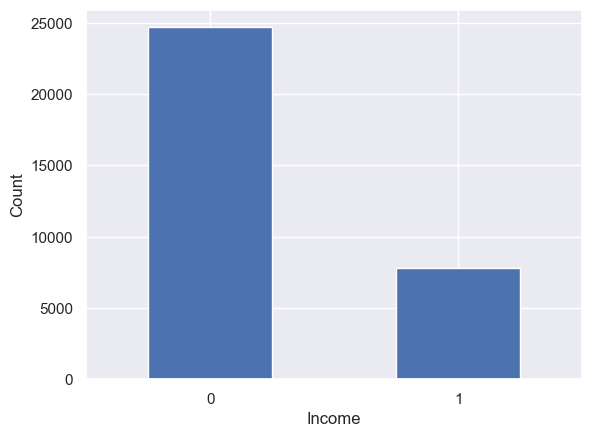

In [43]:
# checking the above info with visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn's default style for the plots
sns.set()

# Create a bar chart of the 'income' column
# value_counts() -> counts how many people fall into each income category (e.g., <=50K, >50K)
# plot(kind='bar') -> makes a bar chart of these counts
income_plot = adult_df_rev['income'].value_counts().plot(kind='bar')

# Add label for x-axis
plt.xlabel('Income')

# Add label for y-axis
plt.ylabel('Count')

# Rotate x-axis labels to 360 degrees (i.e., keep them horizontal)
plt.xticks(rotation=360)

# Display the plot
plt.show()


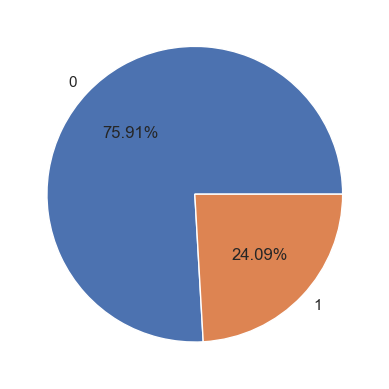

In [44]:
# Create a pie chart of the 'income' column
# value_counts() -> counts how many people are in each income group (<=50K, >50K)
# plot(kind='pie') -> makes a pie chart instead of a bar chart
# autopct="%.2f%%" -> show percentage values with 2 decimal places on the pie
income_plot = adult_df_rev['income'].value_counts().plot(kind='pie',
                                                         autopct="%.2f%%")

# Remove the y-axis label (not needed for a pie chart)
plt.ylabel(None);


In [45]:
# using . values to split instead of loc ,iloc as jts faster and creates array
# .values converts the DataFrame into a numpy array
# [:, 0:-1] -> take all rows (:) and all columns from index 0 up to the second last (-1 excluded)
# This means: take everything except the last column
X = adult_df_rev.values[:, 0:-1]   # --> features (independent variables)

# Select target (Y) from the dataset
# [:, -1] -> take all rows and only the last column
# This means: the dependent/target variable (income)
Y = adult_df_rev.values[:, -1]

# Note:
# .values returns a numpy array (lighter and faster for computation)
# .iloc would return a pandas DataFrame object (heavier, more functionality)
# Arrays are smaller in memory, which helps the ML model train faster


In [46]:
print(X.shape)
print(Y.shape)

(32537, 12)
(32537,)


fit()  learns from the data
transform() applies what was learned



Imagine you’re tailoring clothes for a group of people 

fit()  You take their measurements (learn their average size).

transform()  You stitch clothes using those measurements.

If a new person comes later, you don’t measure everyone again —
you just transform them using the old measurements.

In [47]:
# Import StandardScaler for feature scaling alwas on training data . transform on train and test data
# Scaling makes sure all features are on the same scale (mean=0, std=1)
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Learn the mean and standard deviation of each feature from X
scaler.fit(X)

# Transform X using the learned mean and std
# Each value in X will be scaled as: (value - mean) / std
X = scaler.transform(X)

# Shortcut: we can do both fit() and transform() in one step
# X = scaler.fit_transform(X)

# print(X) would display the scaled version of the features


In [48]:
print(X)

[[ 0.03038995  2.62344898  1.13477712 ... -0.21674317 -0.03566374
   0.26113115]
 [ 0.8369732   1.72054053  1.13477712 ... -0.21674317 -2.22248299
   0.26113115]
 [-0.0429358  -0.08527638 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]
 ...
 [ 1.42357919 -0.08527638 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]
 [-1.2161478  -0.08527638 -0.42067868 ... -0.21674317 -1.65552985
   0.26113115]
 [ 0.9836247   0.81763207 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]]


In [49]:
Y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [50]:
# Convert the target variable Y into integers
# astype(int) changes the data type of Y from object/string to integer
Y = Y.astype(int)


### Running a basic model

In [51]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=0)


In [52]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(22775, 12)
(22775,)
(9762, 12)
(9762,)


In [53]:
import sklearn

In [54]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model object
classifier = LogisticRegression()

# Train (fit) the model on the training data
# X_train -> training features (inputs)
# Y_train -> training labels (outputs/target)
classifier.fit(X_train, Y_train)

# Use the trained model to predict outcomes on the test data
# X_test -> unseen features
Y_pred = classifier.predict(X_test)

# Print the predicted values (0/1 or <=50K/>50K depending on encoding)
print(Y_pred)


[0 0 0 ... 0 0 0]


In [55]:
# Get the predicted probabilities for each class using the trained model
# predict_proba() returns probabilities instead of direct class labels

Y_pred_prob = classifier.predict_proba(X_test)

# Show the predicted probabilities
Y_pred_prob


array([[0.89035269, 0.10964731],
       [0.98760641, 0.01239359],
       [0.98078365, 0.01921635],
       ...,
       [0.87474272, 0.12525728],
       [0.97246196, 0.02753804],
       [0.87430819, 0.12569181]])

In [56]:
# Combine the true labels (Y_test) and predicted labels (Y_pred) into pairs
# zip(Y_test, Y_pred) pairs each true value with its corresponding prediction
# list(...) converts the zip object into a readable list

print(list(zip(Y_test, Y_pred)))


[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0),

In [57]:
# Import evaluation metrics from sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Create a confusion matrix comparing actual vs predicted values
cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)  # Shows counts of true positives, true negatives, false positives, false negatives

# Print a detailed classification report
# Includes precision, recall, f1-score for each class
print("Classification report: ")
print(classification_report(Y_test, Y_pred))

# Calculate overall accuracy of the model
# Accuracy = (number of correct predictions) / (total predictions)
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)


[[7012  384]
 [1296 1070]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.74      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8279041180086048


## Ouput
### 1. **Confusion Matrix**

Output:

```
[[7012  384]
 [1296 1070]]
```

* Rows = Actual values (from `Y_test`)
* Columns = Predicted values (from `Y_pred`)

|              | Predicted 0           | Predicted 1          |
| ------------ | --------------------- | -------------------- |
| **Actual 0** | 7012 (True Negative)  | 384 (False Positive) |
| **Actual 1** | 1296 (False Negative) | 1070 (True Positive) |
 Meaning:

* Model correctly predicted **7012 class 0s** and **1070 class 1s**.
* It made **384 mistakes** where class 0 was wrongly predicted as 1.
* It made **1296 mistakes** where class 1 was wrongly predicted as 0.

---

###  2. **Classification Report**

```
              precision    recall  f1-score   support
0             0.84       0.95     0.89      7396
1             0.74       0.45     0.56      2366
```

* **Precision (How many predicted positives were actually correct):**

  * Class 0: 0.84 → 84% of predicted 0s were correct.
  * Class 1: 0.74 → 74% of predicted 1s were correct.

* **Recall (How many actual positives were captured):**

  * Class 0: 0.95 → Model caught 95% of all actual 0s.
  * Class 1: 0.45 → Model only caught 45% of all actual 1s (many were missed).

* **F1-Score (Balance of Precision & Recall):**

  * Class 0: 0.89 → Strong performance.
  * Class 1: 0.56 → Weak performance (recall is low).

* **Support** = number of actual samples per class:

  * 7396 samples of class 0
  * 2366 samples of class 1

---

###  3. **Overall Accuracy**

```
Accuracy of the model: 0.8279 (~83%)
```

* Accuracy = (Correct predictions) / (Total predictions)
  = (7012 + 1070) ÷ 9762
  = 8082 ÷ 9762 ≈ **82.8%**

---

###  4. **Macro Avg vs Weighted Avg**

* **Macro Avg:** Average of metrics treating both classes equally (simple average).

  * Precision = 0.79, Recall = 0.70, F1 = 0.73.

* **Weighted Avg:** Average of metrics weighted by class size.

  * Precision = 0.82, Recall = 0.83, F1 = 0.81.
  * Since class 0 has more samples, it influences the score more.

---

###  Final Interpretation

* Model performs **well for class 0** (high recall & precision).
* Model performs **poorly for class 1** (recall = 0.45 → it misses more than half of the actual class 1 cases).
* Overall accuracy looks good (83%), but the imbalance between class 
performances shows the model is **biased toward predicting class 0**.

---